Lenght of our Training data: (712, 4) 
Length of our Testing data: (179, 4)
Accuracy Score: 0.782123
F1 Score: 0.677686
Precision Score: 0.694915
In other words, when the model predicts someone survived, it is correct 0.694915 of the time.
Recall Score: 0.661290
In other words, it correctly identifies 0.661290 percent of all survivors
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       117
           1       0.69      0.66      0.68        62

    accuracy                           0.78       179
   macro avg       0.76      0.75      0.76       179
weighted avg       0.78      0.78      0.78       179



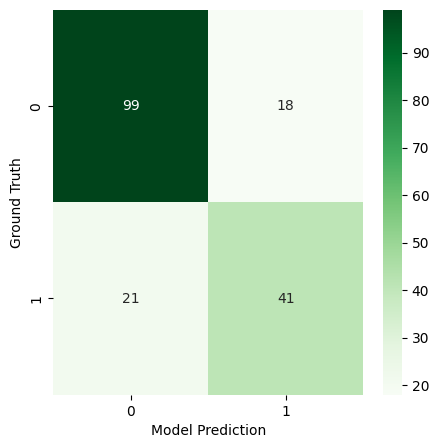

In [4]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
import matplotlib.pyplot as plt

# Helper function to split our data
from sklearn.model_selection import train_test_split
# This is our Logit model
from sklearn.linear_model import LogisticRegression
# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score


# Load data
df = pd.read_csv('data/titanic.csv')

# Convert categorical to numerical
df = pd.get_dummies(df, columns=['sex', 'pclass'], drop_first=True)


# Select the dependent and independent features
selected_features = ['fare', 'pclass_2', 'pclass_3', 'sex_male']
X = df[selected_features]
y = df['survived']


# Split your data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('Lenght of our Training data:', X_train.shape, '\nLength of our Testing data:', X_test.shape)


# Initalize our model.  
model = LogisticRegression()

# Train your model on the training data
model.fit(X=X_train, y=y_train)

# Make predicitions on the testing data
y_pred = model.predict(X_test)


# Evaulate our model

# ACCURACY
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

# F1 SCORE
f1 = f1_score(y_test, y_pred)
print("F1 Score: %f" % f1)


# CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.ylabel('Ground Truth')
plt.xlabel('Model Prediction');

precision = precision_score(y_test, y_pred)
print("Precision Score: %f" % precision)
print("In other words, when the model predicts someone survived, it is correct %f of the time." % precision)


recall = recall_score(y_test, y_pred)
print("Recall Score: %f" % recall)
print("In other words, it correctly identifies %f percent of all survivors" % recall)


# Classification report
print(classification_report(y_test, y_pred))

In [ ]:
### WHY ARE PRECISION AND RECALL SCORES DIFFERENT IN CLASSFICIATION REPORT ???

## ChatGPTs Version of this code... 
Who can spot the little huge mistake....

Optimization terminated successfully.
         Current function value: 0.443097
         Iterations 7
Accuracy Score: 0.763636
F1 Score: 0.786885
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  128
Model:                          Logit   Df Residuals:                      125
Method:                           MLE   Df Model:                            2
Date:                Sat, 11 Oct 2025   Pseudo R-squ.:                  0.2866
Time:                        15:30:51   Log-Likelihood:                -56.716
converged:                       True   LL-Null:                       -79.499
Covariance Type:            nonrobust   LLR p-value:                 1.275e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2875      0.758      4.339      0.000       1.8

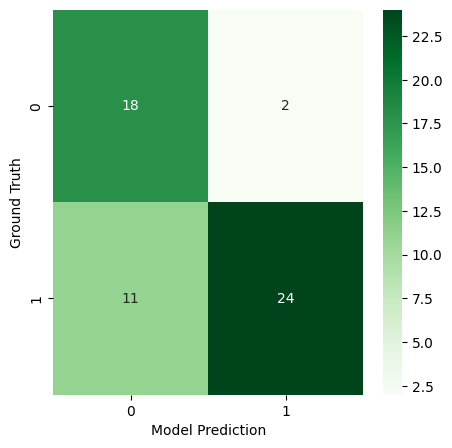

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Load and Inspect
df = pd.read_csv('data/titanic.csv')

# Inspect, we did this in the previous lecture file. 

# Select and Engineer. 
features = ['age', 'sex_male']
target = 'survived'

# Drop rows with missing target or missing important features
df.dropna(inplace=True)

# Convert categorical variables to dummy variables (one-hot encoding)
df = pd.get_dummies(df, columns=['sex', 'pclass'], dtype=int, drop_first=True)

# Define Features and Target
X = df[features]  
y = df[target]


# Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Adding a constant term for intercept 
X_train_sm = sm.add_constant(X_train)   


# Fit the Logistic Regression Model using Statsmodels
logit_model = sm.Logit(endog=y_train, exog=X_train_sm)
result = logit_model.fit()

# Make Predictions on the Test Set
X_test_sm = sm.add_constant(X_test)  # Adding constant to test data
y_pred_prob = result.predict(X_test_sm)  # Predicting probabilities
y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Convert probabilities to binary predictions (using 0.5 as threshold)

###################################### 
##################### EVALUATE 

# ACCURACY
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

# F1 ACCURACY
f1 = f1_score(y_test, y_pred)
print("F1 Score: %f" % f1)


# CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.ylabel('Ground Truth')
plt.xlabel('Model Prediction');



# Add to our dataframe to interprept 
X_test_sm['y_pred_proba'] = y_pred_prob
X_test_sm['y_pred'] = y_pred

# Print the summary of the model
print(result.summary())

print(classification_report(y_pred, y_test))